In [15]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import animation

In [16]:
FILE0 = "logs/ConSteer/ac_50_debug.csv"

df0 = pd.read_csv(FILE0,skiprows=1)
df0.columns = [s.strip() for s in df0.columns]
df0

,timestamp,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,acc_x,acc_y,acc_z,...,4_max_danger_force_z,5_max_danger_force_x,5_max_danger_force_y,5_max_danger_force_z,6_max_danger_force_x,6_max_danger_force_y,6_max_danger_force_z,7_max_danger_force_x,7_max_danger_force_y,7_max_danger_force_z
0,0.003908,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0322,4.7396,-1.5925,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.066436,0.0000,0.0000,-0.0020,0.0000,-0.0000,-0.0273,4.7192,-1.6520,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.128964,-0.0000,0.0000,-0.0035,0.0000,0.0000,-0.0199,4.6551,1.8250,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.191492,-0.0000,0.0000,-0.0046,0.0000,0.0000,-0.0146,1.8590,4.6416,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.254020,-0.0000,0.0000,-0.0054,-0.0000,0.0000,-0.0106,-2.1402,4.5188,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,91.482368,-0.2857,188.9826,47.0036,-0.0018,3.0875,-0.0000,-0.0000,5.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1464,91.544899,-0.2858,189.1756,47.0036,-0.0017,3.0875,-0.0000,-0.0000,5.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465,91.607430,-0.2859,189.3686,47.0036,-0.0017,3.0875,-0.0000,-0.0000,5.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,91.669952,-0.2860,189.5616,47.0036,-0.0017,3.0875,-0.0000,-0.0000,5.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
FILE1 = "logs/ConSteer/ac_51_debug.csv"

df1 = pd.read_csv(FILE1,skiprows=1)
df1.columns = [s.strip() for s in df1.columns]
df1

,timestamp,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,acc_x,acc_y,acc_z,...,4_max_danger_force_z,5_max_danger_force_x,5_max_danger_force_y,5_max_danger_force_z,6_max_danger_force_x,6_max_danger_force_y,6_max_danger_force_z,7_max_danger_force_x,7_max_danger_force_y,7_max_danger_force_z
0,0.003908,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0322,4.6651,1.7992,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.066436,0.0000,0.0000,-0.0020,0.0000,0.0000,-0.0273,4.7420,1.5854,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.128964,0.0000,0.0000,-0.0035,0.0000,0.0000,-0.0199,2.2040,4.4880,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.191492,-0.0000,0.0000,-0.0046,0.0000,0.0000,-0.0146,4.5473,2.0790,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.254020,-0.0000,0.0000,-0.0054,0.0000,0.0000,-0.0106,2.2159,4.4822,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,91.482368,-0.8541,-171.8094,47.3255,1.3608,-1.1107,-0.0088,0.0567,4.9997,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1464,91.544899,-0.7671,-171.8798,47.3250,1.4210,-1.1314,0.0011,0.0000,-5.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465,91.607430,-0.6770,-171.9499,47.3258,1.4561,-1.1137,0.0132,0.0000,-5.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,91.669952,-0.5855,-172.0194,47.3265,1.4711,-1.1142,0.0098,0.0000,-5.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print(min(df0[['pos_x','pos_y']].min(axis=0)))
print(max(df0[['pos_x','pos_y']].max(axis=0)))

-0.2861
189.7545


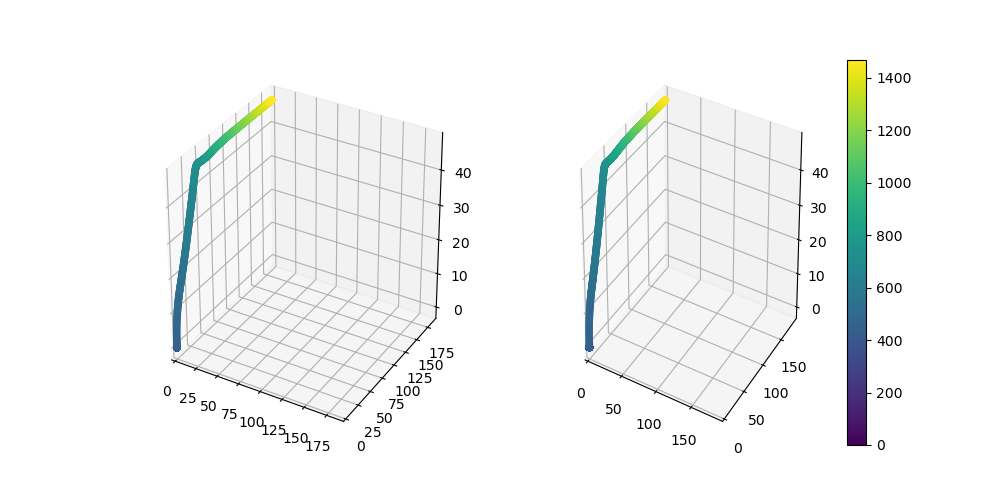

In [19]:
fig = plt.figure(figsize=(10,5))
ax0 = fig.add_subplot(121,projection='3d')
ax1 = fig.add_subplot(122,projection='3d')
res0 = ax0.scatter(*df0[['pos_x','pos_y','pos_z']].to_numpy().T, c=np.arange(len(df0)))
ax0.set_xlim(min(df0[['pos_x','pos_y']].min(axis=0)),max(df0[['pos_x','pos_y']].max(axis=0)))
ax0.set_ylim(min(df0[['pos_x','pos_y']].min(axis=0)),max(df0[['pos_x','pos_y']].max(axis=0)))
res1 = ax1.scatter(*df1[['pos_x','pos_y','pos_z']].to_numpy().T, c=np.arange(len(df1)))
ax1.set_xlim(min(df1[['pos_x','pos_y']].min(axis=0)),max(df1[['pos_x','pos_y']].max(axis=0)))
ax1.set_ylim(min(df1[['pos_x','pos_y']].min(axis=0)),max(df1[['pos_x','pos_y']].max(axis=0)))
fig.colorbar(res0, ax=ax1)

#plt.close(fig)

In [20]:
#for c in df1.columns:
#    if "align" in c: print(c)
align_frame0 = df0[[f"{i}_align" for i in range(8)]].astype(float)
align_frame1 = df1[[f"{i}_align" for i in range(8)]].astype(float)
#align_frame1

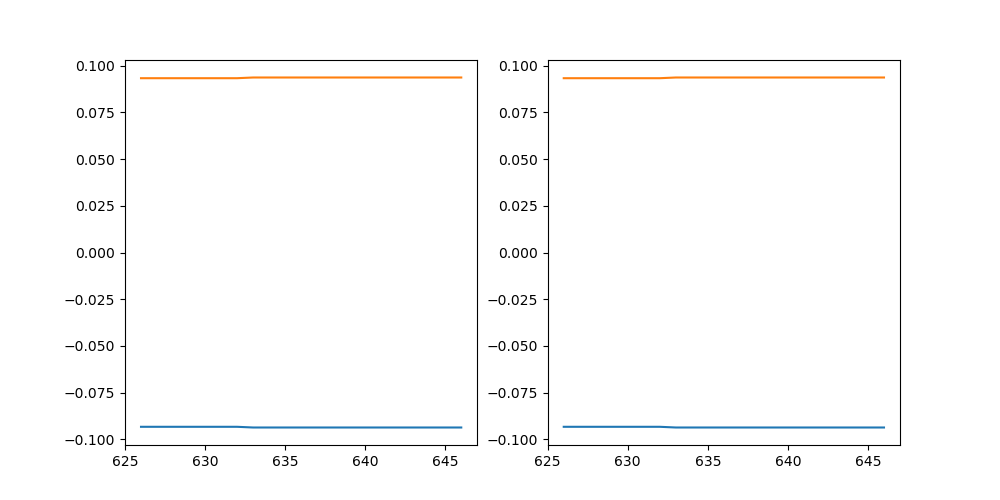

In [21]:
mins0 = align_frame0.min(axis=1,skipna=True)*1.25
maxs0 = align_frame0.max(axis=1,skipna=True)*1.25
mins1 = align_frame1.min(axis=1,skipna=True)*1.25
maxs1 = align_frame1.max(axis=1,skipna=True)*1.25

fig = plt.figure(figsize=(10,5))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.plot(mins0)
ax0.plot(maxs0)
ax1.plot(mins1)
ax1.plot(maxs1)

#plt.close(fig)

/tmp/ipykernel_4842/6605494.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mins0 = intrest_frame0.min(axis=1,skipna=True)
/tmp/ipykernel_4842/6605494.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxs0 = intrest_frame0.max(axis=1,skipna=True)
/tmp/ipykernel_4842/6605494.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mins1 = intrest_frame1.min(axis=1,skipna=True)
/tmp/ipykernel_4842/6605494.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with '

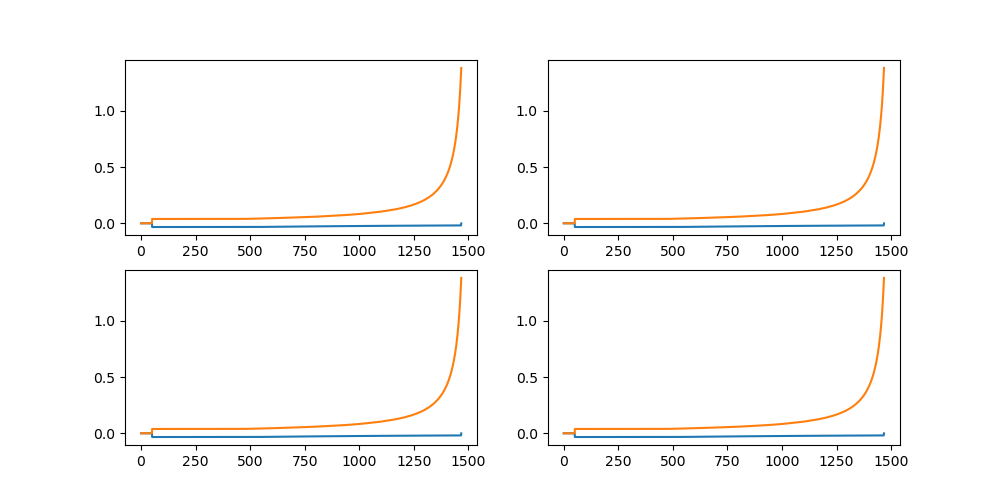

In [22]:
intrest_frame0 = df0[[s for s in df0.columns if "interest" in s]]
intrest_frame1 = df1[[s for s in df1.columns if "interest" in s]]

mins0 = intrest_frame0.min(axis=1,skipna=True)
maxs0 = intrest_frame0.max(axis=1,skipna=True)
mins1 = intrest_frame1.min(axis=1,skipna=True)
maxs1 = intrest_frame1.max(axis=1,skipna=True)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(mins0)
ax1.plot(maxs0)
ax2.plot(mins1)
ax2.plot(maxs1)
ax3.plot(mins0)
ax3.plot(maxs1)
ax4.plot(mins1)
ax4.plot(maxs1)

#plt.close(fig)

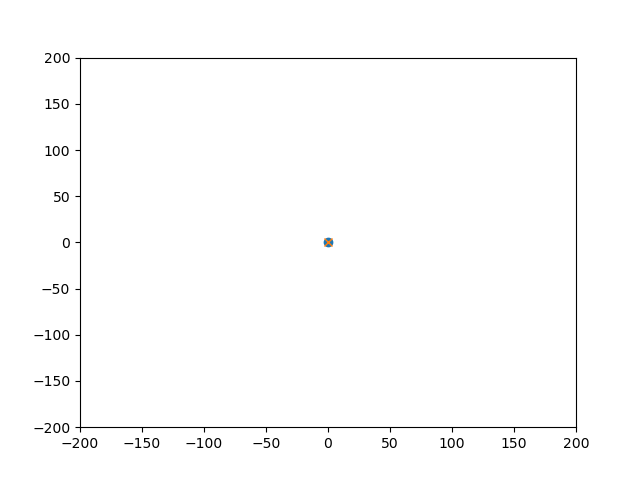

In [33]:
# Animation of drone movement

fig = plt.figure()
ax = fig.add_subplot()

# create the path for drone 50
t0=df0['timestamp'].tolist()
x0=df0['pos_x'].tolist()
y0=df0['pos_y'].tolist()
#z=df0['pos_z'].tolist()

# create the 50 drone plot
point0, = ax.plot([x0[0]], [y0[0]], 'o')
#line0, = ax.plot(x0, y0, label='drone_50')

# create the path for drone 51
t1=df1['timestamp'].tolist()
x1=df1['pos_x'].tolist()
y1=df1['pos_y'].tolist()
#z=df0['pos_z'].tolist()

# create the 51 drone plot
point1, = ax.plot([x1[0]], [y1[0]], 'x')
#line1, = ax.plot(x1, y1, label='drone_51')


#ax.legend()
ax.set_xlim([-200,200])
ax.set_ylim([-200,200])
#ax.set_zlim(min(df0[['pos_z']].min(axis=0)),max(df0[['pos_z']].max(axis=0)))

#move the point position at every frame
def update_point(n, x, y, point):
    point.set_data(np.array([x[n], y[n]]))
    #point.set_3d_properties(z[n], 'z')
    return point

ani0=animation.FuncAnimation(fig, update_point, len(df0.index)-1, interval=10, fargs=(x0, y0, point0))
ani1=animation.FuncAnimation(fig, update_point, len(df1.index)-1, interval=10, fargs=(x1, y1, point1))


plt.show()


In [32]:
plt.close('all')